In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import yfinance as yf
import pandas_ta as ta


In [3]:
from keras.models import Sequential

In [4]:
from keras.layers import *

In [5]:
df = yf.download(tickers = 'TATAMOTORS.NS', start = '2018-11-20',end = '2023-11-28')

[*********************100%%**********************]  1 of 1 completed


In [6]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-20,184.050003,188.300003,183.199997,183.750000,183.179092,13114982
2018-11-21,184.399994,186.750000,183.750000,184.149994,183.577835,8097107
2018-11-22,185.500000,186.149994,181.750000,182.550003,181.982819,9135857
2018-11-26,183.899994,184.449997,177.000000,181.750000,181.185303,9865426
2018-11-27,181.699997,184.550003,178.550003,180.050003,179.490585,11639680
2018-11-28,181.000000,181.350006,174.000000,174.449997,173.907974,12504717
2018-11-29,175.949997,179.350006,173.449997,177.250000,176.699280,20892744
2018-11-30,172.000000,174.899994,170.350006,171.949997,171.415741,18393012
2018-12-03,173.250000,176.449997,170.000000,175.449997,174.904877,14068885


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-20,682.000000,686.750000,670.700012,674.299988,674.299988,8324354
2023-11-21,677.000000,683.299988,675.000000,681.700012,681.700012,7291057
2023-11-22,683.950012,687.349976,676.049988,681.200012,681.200012,9279642
2023-11-23,683.200012,685.900024,677.049988,679.950012,679.950012,5885370
2023-11-24,681.400024,681.950012,671.250000,673.700012,673.700012,6951690


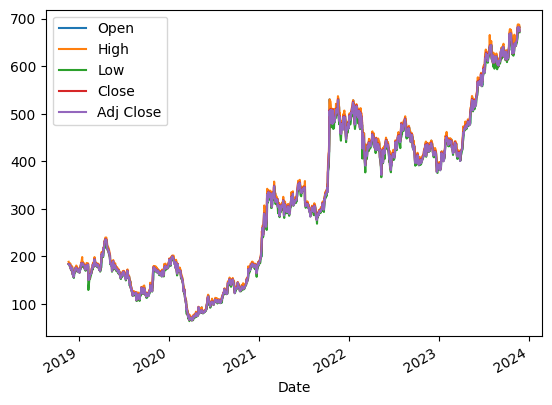

In [11]:
df.iloc[:,:-1].plot()
plt.show()

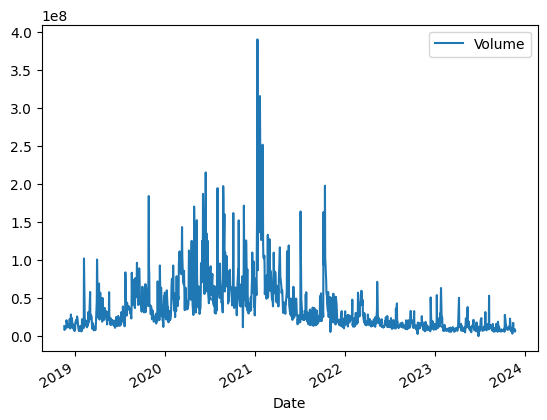

In [10]:
df.iloc[:,-1].plot()
plt.legend()
plt.show()


C:\Users\alokk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


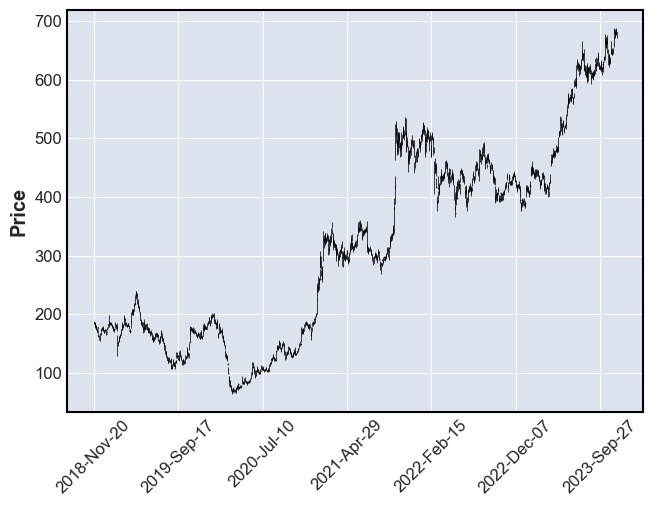

In [13]:
mpf.plot(df)

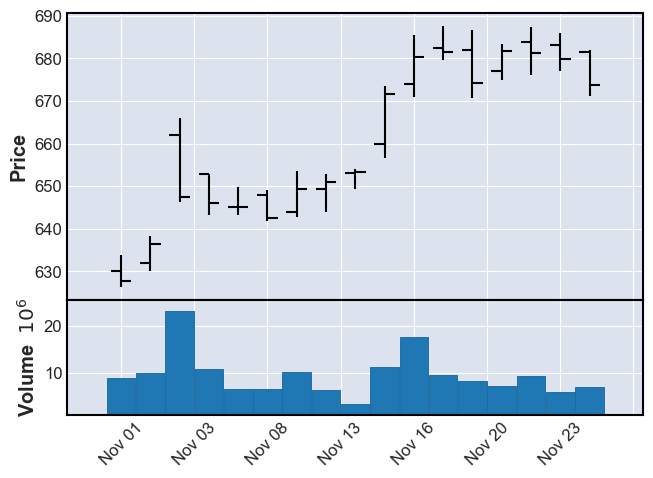

In [20]:
mpf.plot(df['2023-11':'2023-12'], volume=True)

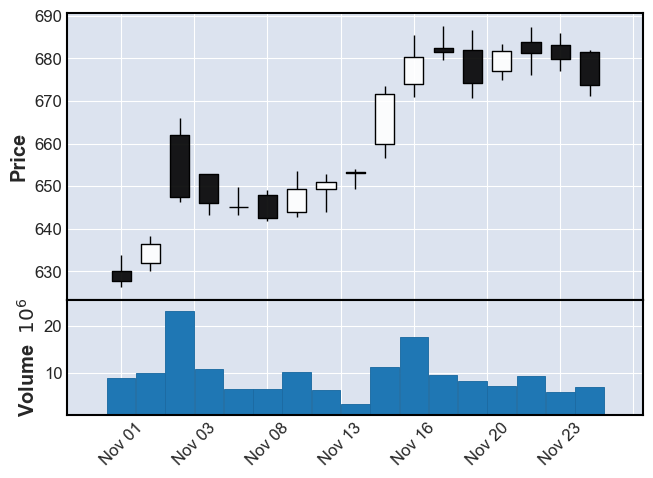

In [21]:
mpf.plot(df['2023-11':'2023-12'], type='candle', volume=True)

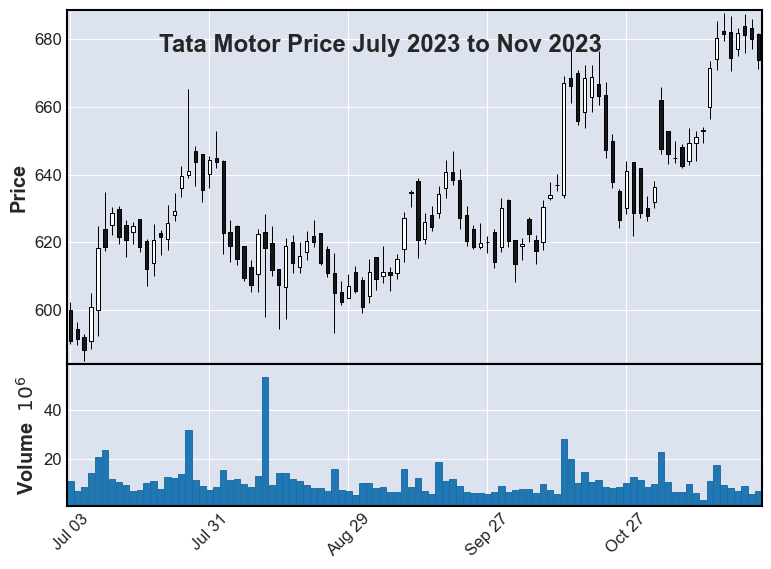

In [24]:
 mpf.plot(df['2023-07':'2023-11'], type='candle',title= 'Tata Motor Price July 2023 to Nov 2023', volume = True, tight_layout = True)

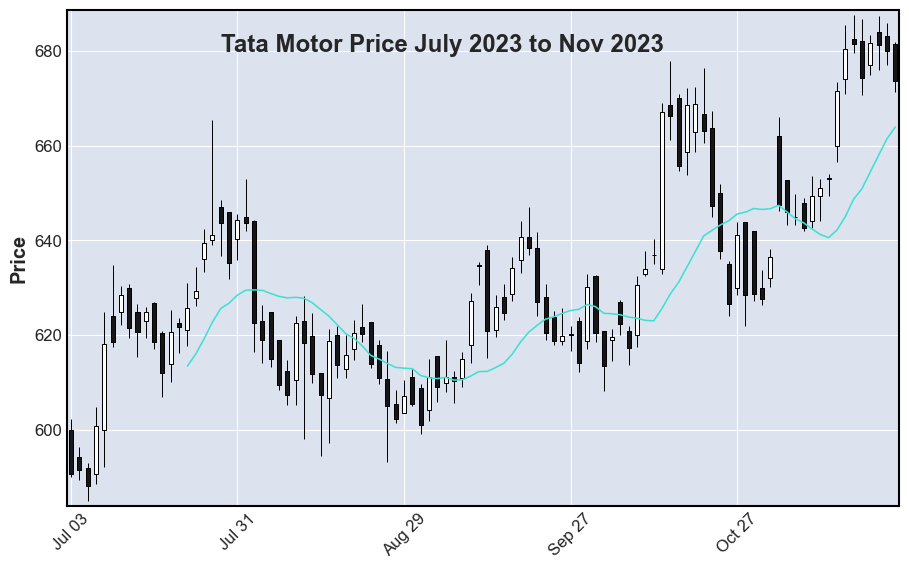

In [30]:
mpf.plot(df['2023-07':'2023-11'], figratio=(20,12), type='candle', title= 'Tata Motor Price July 2023 to Nov 2023', mav=15, tight_layout = True)

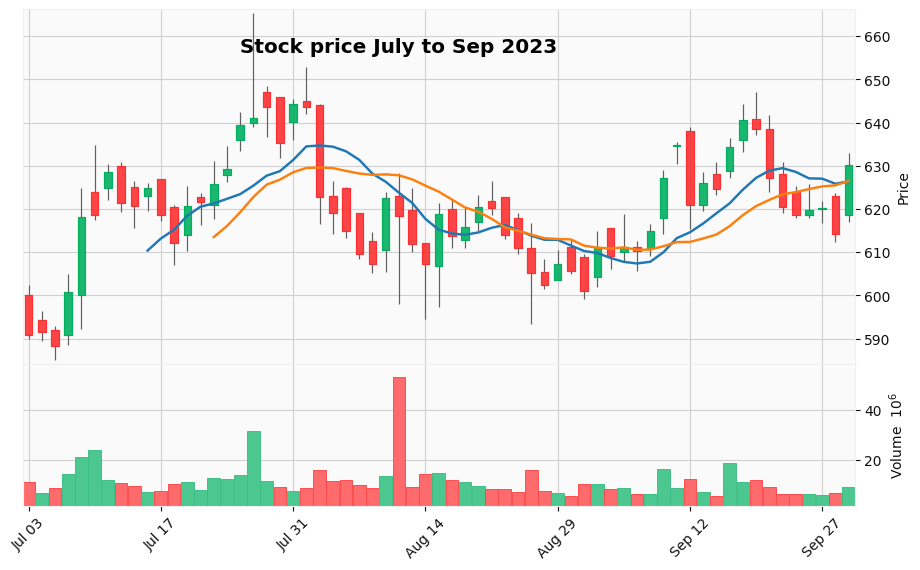

In [31]:
mpf.plot(df['2023-07':'2023-09'],figratio=(10,6),type='candle', title='Stock price July to Sep 2023', mav=(10,15), volume = True, tight_layout = True, style = 'yahoo')

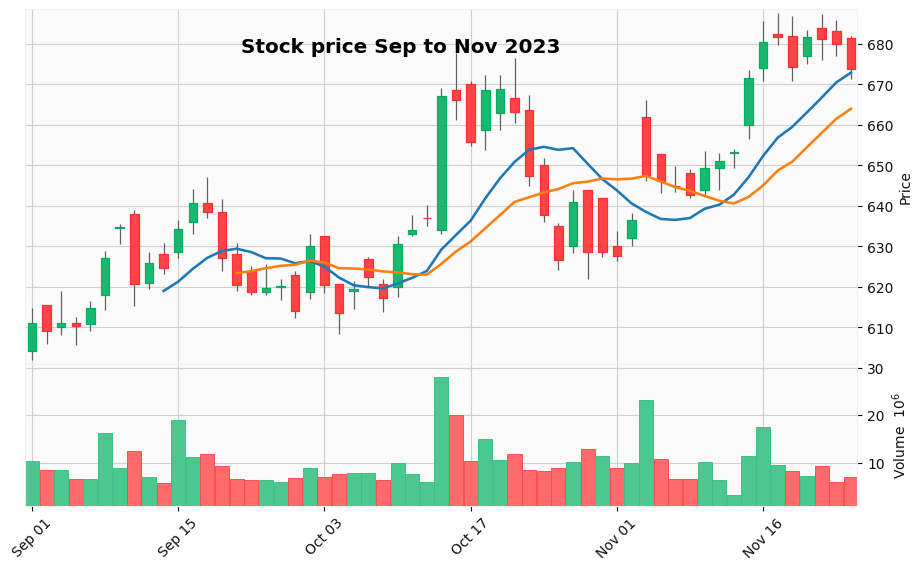

In [32]:
mpf.plot(df['2023-09':'2023-11'],figratio=(10,6),type='candle', title='Stock price Sep to Nov 2023', mav=(10,15), volume = True, tight_layout = True, style = 'yahoo')

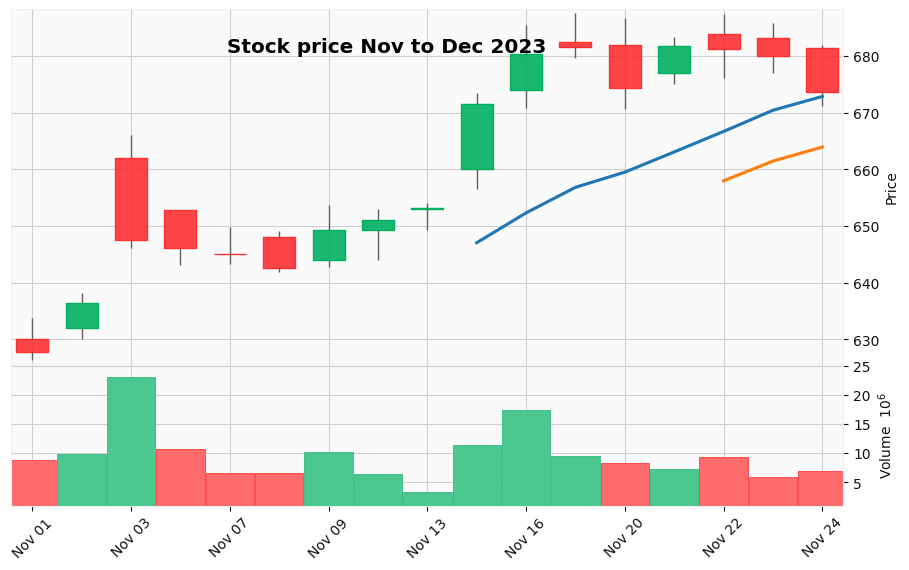

In [33]:
mpf.plot(df['2023-11':'2023-12'],figratio=(10,6),type='candle', title='Stock price Nov to Dec 2023', mav=(10,15), volume = True, tight_layout = True, style = 'yahoo')

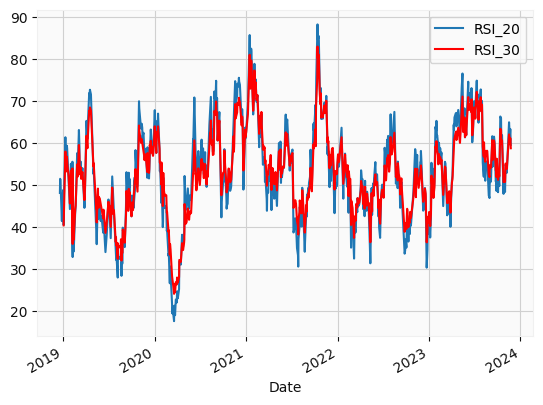

In [34]:
#Calculate the RSI with a lookback period of 20.
RSI20= ta.rsi(df.Close, length=20)
RSI30= ta.rsi(df.Close, length=30)
RSI20.plot()
RSI30.plot(color = 'red')
plt.legend()
plt.show()

In [35]:
df['RSI'] = ta.rsi(df.Close, length=20)

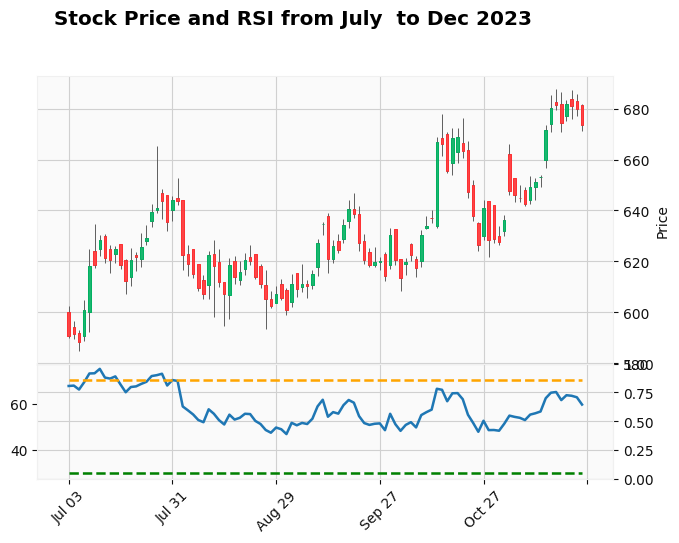

In [38]:
mpf.plot(df['2023-07':'2023-12'], type='candle', style='yahoo',
         title= 'Stock Price and RSI from July  to Dec 2023',
         addplot=[mpf.make_addplot(df['RSI']['2023-07':'2023-12'], panel=1, secondary_y=True),
                  mpf.make_addplot([70] * len(df['2023-07':'2023-12']), panel=1, secondary_y=True, color='orange', linestyle='--'),
                  mpf.make_addplot([30] * len(df['2023-07':'2023-12']), panel=1, secondary_y=True, color='green', linestyle='--')
                  ])

In [ ]:
fig, rs = mpf.plot(df, type='candle', style='yahoo', figratio=(5,3),
         title= 'Stock Price and RSI', tight_layout = True,
         addplot=[mpf.make_addplot(df['RSI'], panel=1, secondary_y=True),
                  mpf.make_addplot([70] * len(df), panel=1, secondary_y=True, color='orange', linestyle='--'),
                  mpf.make_addplot([30] * len(df), panel=1, secondary_y=True, color='g', linestyle='--')],
        returnfig = True
                   )
rs[1].annotate('Overbought', xy=(df.index[-1], 70), xytext=(df.index[-1], 70), textcoords='offset points',
                  color='r', ha='right', va='bottom', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

rs[1].annotate('Oversold', xy=(df.index[-1], 30), xytext=(df.index[-1], 30),  textcoords='offset points',
                  color='r', ha='right', va='top', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

mpf.show()

In [40]:
#calculates the EMA with a smoothing period of 20.
df['EMAF']= ta.ema(df.Close, length=20)

In [41]:
# calculates the EMA with a smoothing period of 100.
df['EMAM']=ta.ema(df.Close, length=100)

In [42]:
# calculates the EMA with a smoothing period of 150.
df['EMAS']=ta.ema(df.Close, length=200)

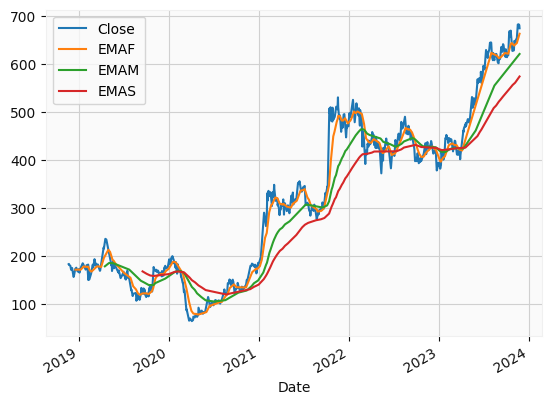

In [43]:
df['Close'].plot()
df['EMAF'].plot()
df['EMAM'].plot()
df['EMAS'].plot()
plt.legend()

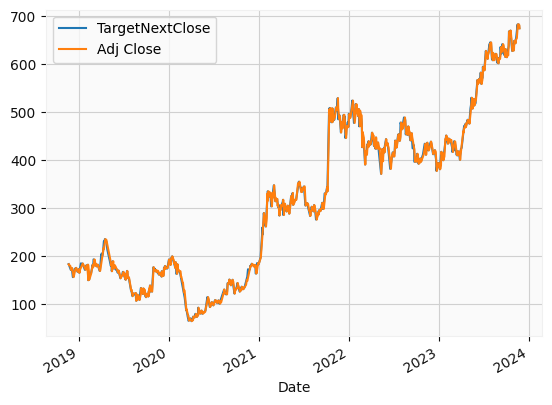

In [44]:
df['Target'] = df['Adj Close']- df['Open']
df['Target'] = df['Target'].shift(-1)
df['TargetNextClose'] = df['Adj Close'].shift(-1)
df['TargetNextClose'].plot()
df['Adj Close'].plot()
plt.legend()

<AxesSubplot:xlabel='Date'>

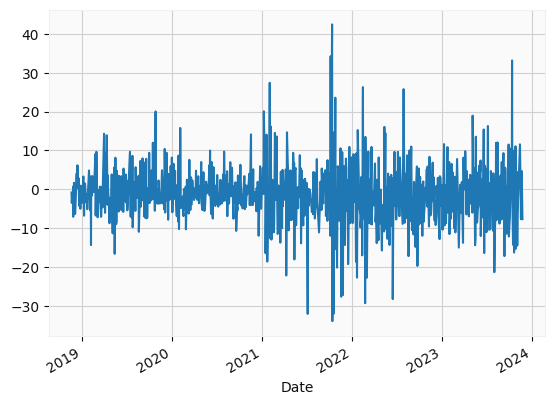

In [45]:
df['Target'].plot()

In [46]:
df['TargetClass'] = [1 if df.Target[i]>0 else 0 for i in range(len(df))]

<AxesSubplot:ylabel='TargetClass'>

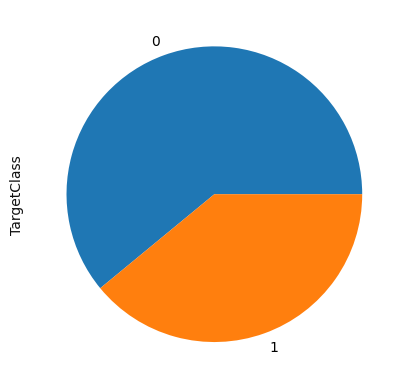

In [47]:
df['TargetClass'].value_counts().plot(kind='pie', )


In [48]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose,TargetClass
Date,,,,,,,,,,,,,
2023-11-20,682.000000,686.750000,670.700012,674.299988,674.299988,8324354,61.475136,654.228707,615.350723,569.241441,4.700012,681.700012,1
2023-11-21,677.000000,683.299988,675.000000,681.700012,681.700012,7291057,63.563552,656.845022,616.664571,570.360432,-2.750000,681.200012,0
2023-11-22,683.950012,687.349976,676.049988,681.200012,681.200012,9279642,63.319419,659.164545,617.942500,571.463314,-3.250000,679.950012,0
2023-11-23,683.200012,685.900024,677.049988,679.950012,679.950012,5885370,62.685836,661.144113,619.170372,572.542783,-7.700012,673.700012,0
2023-11-24,681.400024,681.950012,671.250000,673.700012,673.700012,6951690,59.549714,662.339913,620.250167,573.549323,NaN,NaN,0


In [ ]:
%pip install statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose
decompose= seasonal_decompose(df.Close, period=365)
decompose.plot()
plt.show()

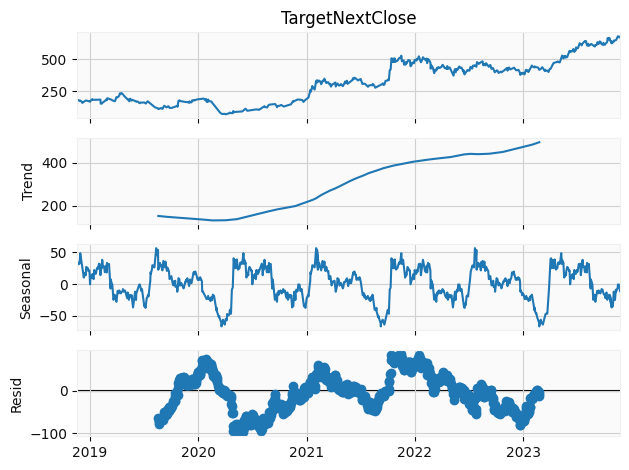

In [51]:
decompose= seasonal_decompose(df.TargetNextClose.dropna(), period=365)
decompose.plot()
plt.show()


In [52]:
#Augmented Dicker Fuller(ADFuller) Test for checking stationarity
from statsmodels.tsa.stattools import adfuller
def adfuller_prob(df,col):
  ts= df[col].dropna()
  ts_prob = adfuller(ts)[1]
  print(f'Probability  is {ts_prob}')
  if ts_prob < 0.05:
    print('TS is stationary')
  else:
    print(f'TS = {col} is non-stationary')
    ts1 = df[col].diff().dropna()
    ts1_prob = adfuller(ts1)[1]
    print(f'Probability of 1st difference is {ts1_prob}')
    if ts1_prob < 0.05:
      print(f'TS{col} of diff1 is stationary')

adfuller_prob(df, col='Close')

Probability  is 0.972708723344621
TS = Close is non-stationary
Probability of 1st difference is 1.1095508384986582e-29
TSClose of diff1 is stationary


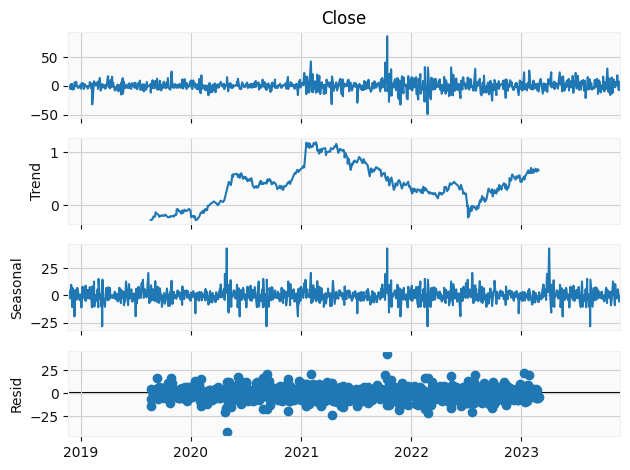

In [53]:
seasonal_decompose(df.Close.diff().dropna(), period=365).plot()
plt.show()

In [54]:
adfuller_prob(df, col='Target')

Probability  is 1.9617981007392684e-16
TS is stationary


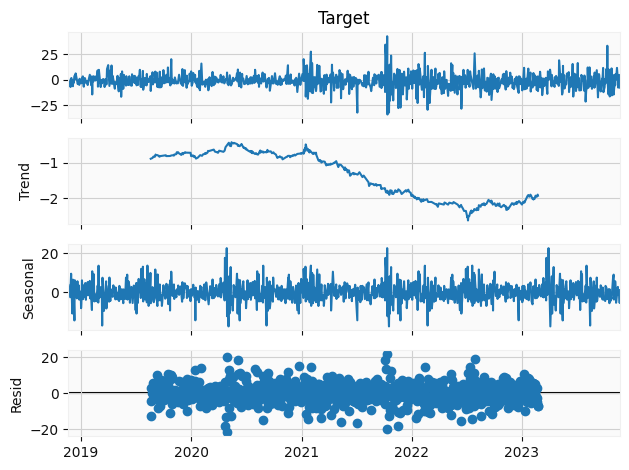

In [55]:
seasonal_decompose(df.Target.dropna(), period=365).plot()
plt.show()

In [56]:
df1 = df.dropna(inplace= True)
df1= df.reset_index()
df1= df1.drop(['Volume','Close'],axis=1)
pd.set_option('display.max_columns', None)

df1.head()

,Date,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose,TargetClass
0,2019-09-16,128.000000,130.300003,126.500000,128.200439,49.501206,123.338598,147.752715,168.624750,-7.379059,121.620941,0
1,2019-09-17,129.000000,130.500000,121.349998,121.620941,45.578954,123.211113,147.242760,168.160822,-1.678284,121.371719,0
2,2019-09-18,123.050003,125.900002,120.500000,121.371719,45.435409,123.071959,146.737953,167.699023,0.314110,123.814110,1
3,2019-09-19,123.500000,125.349998,121.199997,123.814110,47.152328,123.179391,146.291657,167.266197,7.835983,132.835983,1
4,2019-09-20,125.000000,137.750000,122.599998,132.835983,52.913311,124.138497,146.033406,166.927727,-7.497383,127.502617,0


In [59]:
df1.Date.tail(1)


1039   2023-11-23
Name: Date, dtype: datetime64[ns]

In [60]:
last_day = df1.Date.tail(1).values
print('Last Date =', last_day)

Last Date = ['2023-11-23T00:00:00.000000000']


In [62]:
df1.shape

(1040, 12)

In [63]:
#excluding date and target_class
final_df = df1.iloc[:,1:-1]
final_df.head()

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
0,128.000000,130.300003,126.500000,128.200439,49.501206,123.338598,147.752715,168.624750,-7.379059,121.620941
1,129.000000,130.500000,121.349998,121.620941,45.578954,123.211113,147.242760,168.160822,-1.678284,121.371719
2,123.050003,125.900002,120.500000,121.371719,45.435409,123.071959,146.737953,167.699023,0.314110,123.814110
3,123.500000,125.349998,121.199997,123.814110,47.152328,123.179391,146.291657,167.266197,7.835983,132.835983
4,125.000000,137.750000,122.599998,132.835983,52.913311,124.138497,146.033406,166.927727,-7.497383,127.502617


In [64]:
#split data into train test sets
splitlimit = int(len(final_df)*0.8)
print('split limit :', splitlimit)
train_data, test_data = final_df[:splitlimit], final_df[splitlimit:]
print('Shape of train', train_data.shape )
print('Shape of test', test_data.shape )

split limit : 832
Shape of train (832, 10)
Shape of test (208, 10)


Sacling the Data
Scaling is important when working with Long Short-Term Memory (LSTM) networks for predicting stock
prices or any time series data. LSTMs are a type of recurrent neural network (RNN) that are well-suited for
sequential data like stock prices.


In [66]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_train = sc.fit_transform(train_data)
sc_test = sc.transform(test_data)
print('==='*25)
print('Scaled Trained data')
print('==='*25)
print(sc_train)
print('==='*25)
print('Scaled Test data')
print('==='*25)
print(sc_test)
print('==='*25)

Scaled Trained data
[[-1.17036936 -1.17607101 -1.16033415 ... -0.78719897 -0.83886805
  -1.21558592]
 [-1.16329599 -1.17466961 -1.19725705 ... -0.79107122 -0.04049002
  -1.21735978]
 [-1.20538252 -1.20690241 -1.20335111 ... -0.7949257   0.23853927
  -1.19997583]
 ...
 [ 0.8490777   0.81815894  0.85501031 ...  1.31511185  0.33594687
   0.86551921]
 [ 0.84554101  0.85004152  0.89014078 ...  1.31468004 -1.03351017
   0.81656053]
 [ 0.86605374  0.82551655  0.85393493 ...  1.31367948 -0.78510234
   0.76227994]]
Scaled Test data
[[ 0.79956411  0.76840825  0.80123911 ...  1.31205353 -0.09991437
   0.77930913]
 [ 0.78188069  0.80134186  0.8091256  ...  1.31064309  0.21290973
   0.81656053]
 [ 0.80310079  0.79048089  0.83636959 ...  1.3096827   1.71243449
   0.9141234 ]
 ...
 [ 2.71291062  2.69887336  2.77213263 ...  2.56595261 -0.19058097
   2.76727273]
 [ 2.76207063  2.72725216  2.77966051 ...  2.57515799 -0.2606046
   2.75837574]
 [ 2.7567656   2.71709216  2.78683001 ...  2.58416796 -0.88381

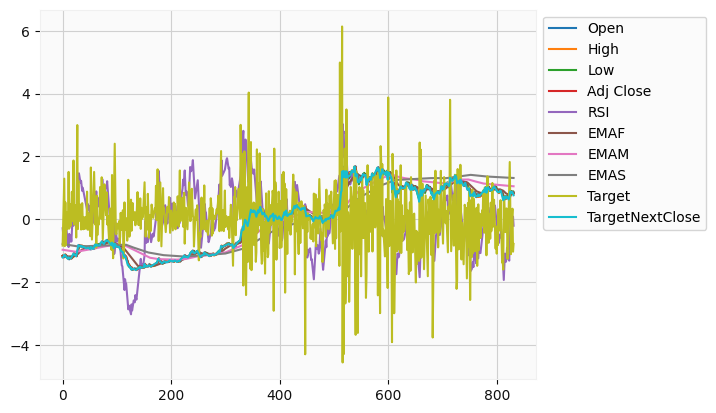

In [67]:
sc_train_df = pd.DataFrame(sc_train, columns = list(final_df))
sc_test_df = pd.DataFrame(sc_test, columns = list(final_df))
sc_train_df.plot()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [68]:
# Next Close prediction
def x_y_split(df, n_target,  n_past=14):
 x = np.array([df.iloc[i-n_past:i,:8].copy() for i in range(n_past,len(df))])
 yi = np.array(df.iloc[n_past:,n_target])
 y=np.reshape(yi,(len(yi),1))
 return x,y

x_train, y_train = x_y_split(sc_train_df , -1, 14)  # -1 is for last column of the dataset which is 'TargetNextClose'
x_test, y_test = x_y_split(sc_test_df ,n_target= -1, n_past=14)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((818, 14, 8), (194, 14, 8), (818, 1), (194, 1))

In [69]:
model =Sequential([
    LSTM(150, activation ='relu', input_shape = (x_train.shape[1],x_train.shape[2]),return_sequences= True),
    LSTM(32, activation ='relu', return_sequences = False),
    Dense(64, activation ='relu'),
    Dense(32, activation ='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation ='linear')
])
model.compile(optimizer ='adam', loss ='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 150)           95400     
                                                                 
 lstm_1 (LSTM)               (None, 32)                23424     
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 123,049
Trainable params: 123,049
Non-trai

In [70]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1,verbose=1)

Epoch 1/20
12/12 [==============================] - 3s 59ms/step - loss: 0.6617 - val_loss: 0.0286
Epoch 2/20
12/12 [==============================] - 0s 24ms/step - loss: 0.2630 - val_loss: 0.0539
Epoch 3/20
12/12 [==============================] - 0s 27ms/step - loss: 0.1302 - val_loss: 0.0231
Epoch 4/20
12/12 [==============================] - 0s 19ms/step - loss: 0.1141 - val_loss: 0.0114
Epoch 5/20
12/12 [==============================] - 0s 28ms/step - loss: 0.1025 - val_loss: 0.0149
Epoch 6/20
12/12 [==============================] - 0s 20ms/step - loss: 0.0970 - val_loss: 0.0092
Epoch 7/20
12/12 [==============================] - 0s 19ms/step - loss: 0.0984 - val_loss: 0.0111
Epoch 8/20
12/12 [==============================] - 0s 22ms/step - loss: 0.0880 - val_loss: 0.0146
Epoch 9/20
12/12 [==============================] - 0s 26ms/step - loss: 0.0857 - val_loss: 0.0130
Epoch 10/20
12/12 [==============================] - 0s 22ms/step - loss: 0.0872 - val_loss: 0.0066
Epoch 11/

<AxesSubplot:>

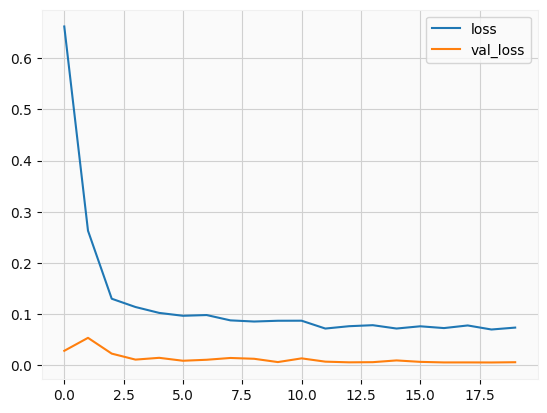

In [71]:
losses = pd.DataFrame(model.history.history)
losses.plot()

[1.0229867] [1.08228642]
[1.0082616] [1.04822782]
[1.0101157] [1.04468009]
[1.0056252] [1.07022399]
[1.0020097] [1.05213046]
[1.0050455] [1.04006825]
[1.0051494] [1.06206421]
[1.0006143] [1.01594362]
[1.0033524] [0.96592038]
[0.99236894] [0.99252862]


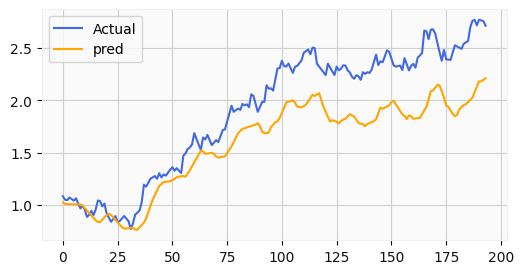

In [72]:
y_pred = model.predict(x_test)
for i in range(10):
 print(y_pred[i], y_test[i])
plt.figure(figsize=(6,3))
plt.plot(y_test, color = 'royalblue', label = 'Actual')
plt.plot(y_pred, color = 'orange', label = 'pred')
plt.legend()
plt.show()